In [2]:
###########################################################################################################################
#               Hassan Shahzad
#               18i-0441
#               CS-D
#               FAST-NUCES ISB
#               chhxnshah@gmail.com
#               "Predicting heart disease using Machine Learning"
#               The following project was one of the guided projects offered by courera. 

###########################################################################################################################


################################################# Predicting Heart Disease from Clinical and Laboratorial Data ################################################################

#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline


In [3]:
# Loading the dataset
data = pd.read_csv('heart.csv')
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Shape
data.shape


(303, 14)

In [5]:
# Variable Types
data.dtypes



age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

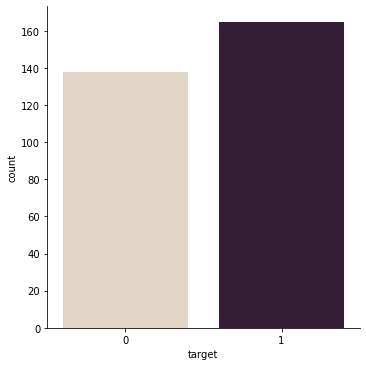

In [6]:
################
#EDA and Pre-Processing
################

# Outcome Variable Count

## Creates a graph of patients having heart disease and those without it
sns.catplot(x = 'target', kind = 'count', palette= 'ch:.25', data = data)


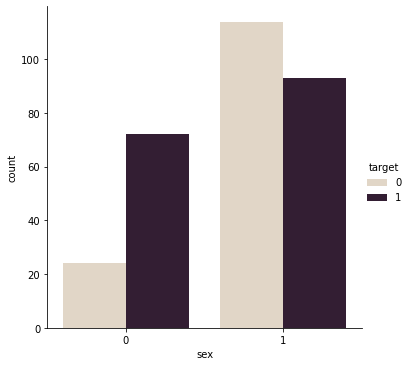

In [7]:

## Categorical Predictive Variables

##  Creates a graph ob basis of sex
sns.catplot(x = 'sex', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


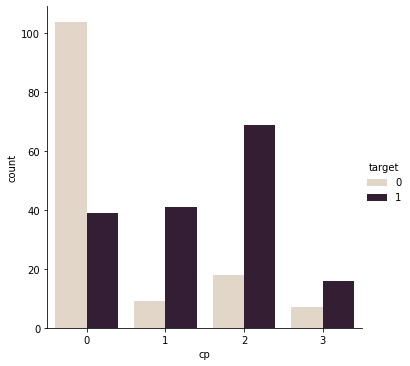

In [9]:

## cp:
sns.catplot(x = 'cp', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


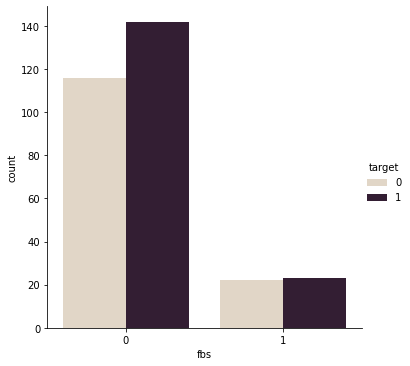

In [10]:

## fbs:
sns.catplot(x = 'fbs', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


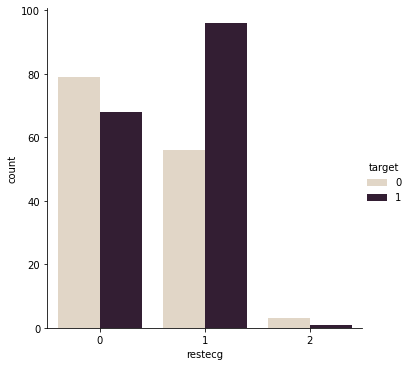

In [11]:

## restecg:
sns.catplot(x = 'restecg', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


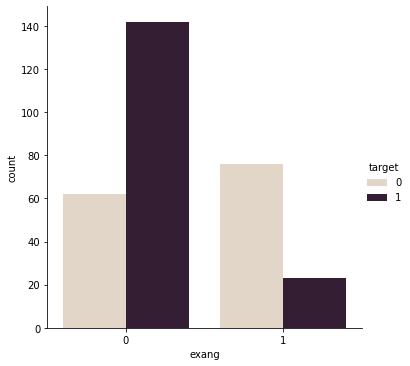

In [12]:

## exang:
sns.catplot(x = 'exang', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


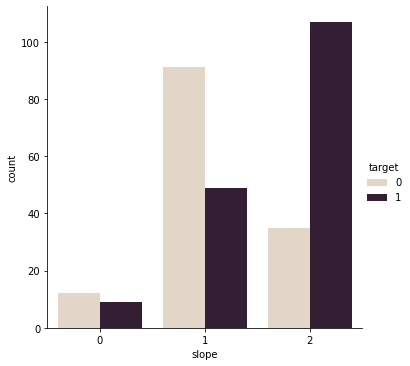

In [13]:

## slope:
sns.catplot(x = 'slope', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


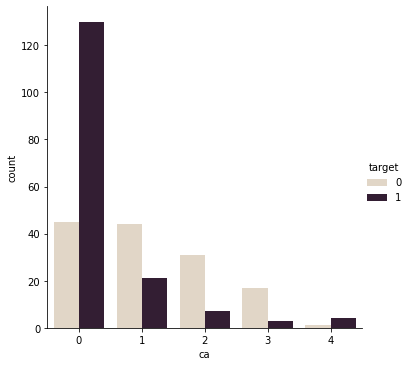

In [14]:

## ca:
sns.catplot(x = 'ca', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


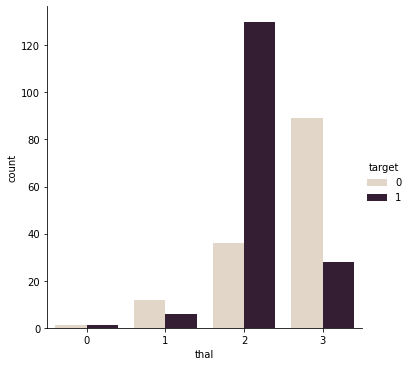

In [15]:

## thal:
sns.catplot(x = 'thal', kind = 'count', hue = 'target', data= data, palette = 'ch:.25')


In [16]:


##################
## Distributional Predictive Variables

##
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].describe()


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


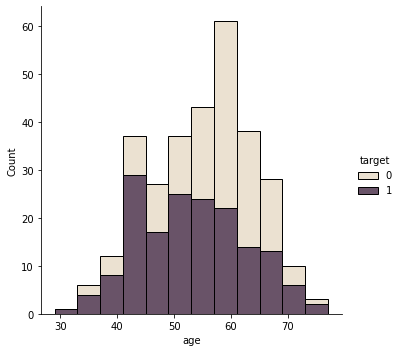

In [17]:

##
sns.displot(x='age', multiple = 'stack', hue = 'target', data= data, palette = 'ch:.25')


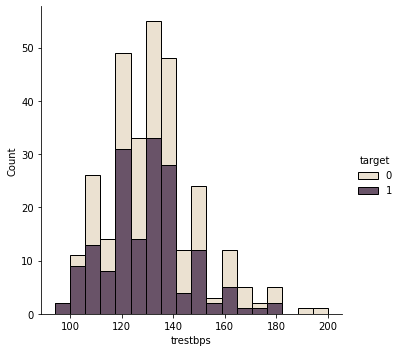

In [18]:

##
sns.displot(x='trestbps', multiple = 'stack', hue = 'target', data= data, palette = 'ch:.25')


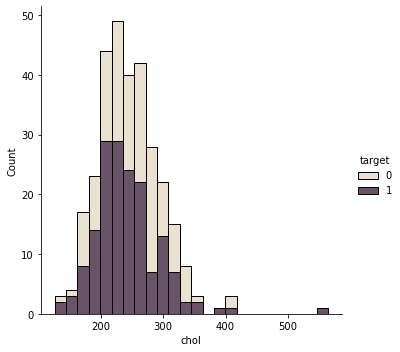

In [19]:

##
sns.displot(x='chol', multiple = 'stack', hue = 'target', data= data, palette = 'ch:.25')


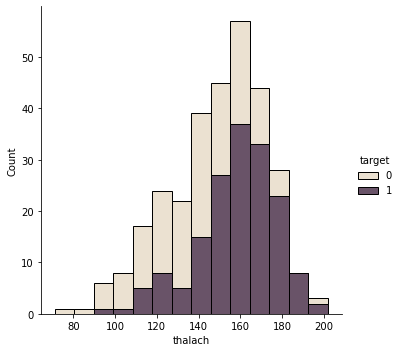

In [20]:

##
sns.displot(x='thalach', multiple = 'stack', hue = 'target', data= data, palette = 'ch:.25')


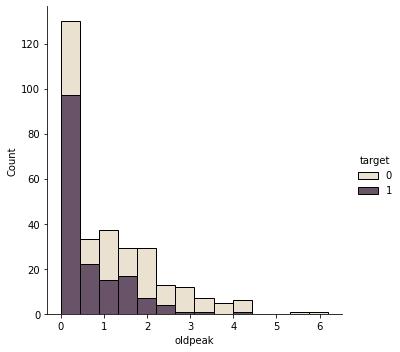

In [21]:

##
sns.displot(x='oldpeak', multiple = 'stack', hue = 'target', data= data, palette = 'ch:.25')


In [22]:


#################
## Splitting and Pre-Processing
##############################

## Defining x_train, x_test, y-train and y_test
x = data.drop('target', axis =1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)


In [23]:

## Scaling the data
sc = StandardScaler().fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)


In [24]:

#####################
## Training The Model
#####################

## Parameters for grid search
knn = KNeighborsClassifier()
parameters = {'n_neighbors': [3,5,7,9,11], 'weights': ['uniform', 'distance']}


In [25]:

## Fiting training data and grid searching
grid = GridSearchCV(knn, parameters, cv = 4, scoring = 'accuracy')
grid.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [26]:

## Displaying best parameters
print(grid.best_params_)


{'n_neighbors': 5, 'weights': 'uniform'}


In [27]:

## Picking the best model
model = grid.best_estimator_


In [28]:

#######################
## Evaluating the Model
######################

## Model score on test data
model.score (x_test,y_test)


0.9016393442622951

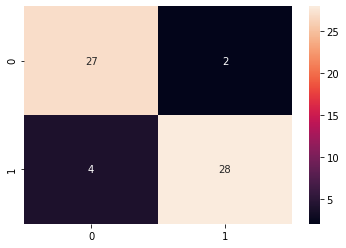

In [29]:

## Confusion (Prediction) Matrix
predictions = model.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
cm = pd.DataFrame(cm)
sns.heatmap(cm, annot=True)
plt.show()


In [30]:

## Calculating sensitivity, specificity, PPV and NPV
TP = 28
FP = 2
TN = 27
FN = 4
sensitivity = TP / (TP + FN) *100
specificity = TN / (TN + FP) * 100
ppv = TP / (TP + FP) * 100
npv = TN / (TN + FN) * 100


In [31]:

## Printing sensitivity, specificity, PPV and NPV
print('Sensitivity:', sensitivity,'% ','Specificity:', specificity,'% ','positive predictive value:',ppv,'% ','negative predictive value:',npv,'%' )



Sensitivity: 87.5 %  Specificity: 93.10344827586206 %  positive predictive value: 93.33333333333333 %  negative predictive value: 87.09677419354838 %


In [32]:

## AUC Score
probs = model.predict_proba(x_test)[:, 1]
auc = metrics.roc_auc_score(y_test, probs)
print(auc)


0.9154094827586208


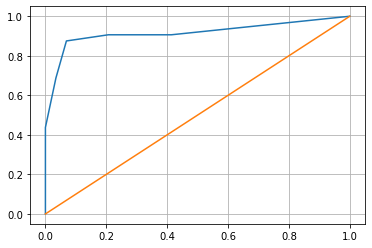

In [33]:

## ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test,probs)
plt.figure()
plt.grid()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.show()